In [1]:
using Pkg
Pkg.activate("/Users/ryansenne/Documents/Github/SSM/")
# Pkg.activate("/home/ryansenne/PycharmProjects/ssm_julia/")

  Activating project at `\Users\ryansenne\Documents\Github\SSM`


In [2]:
include("/Users/ryansenne/Documents/Github/SSM//src/SSM.jl")
# include("/home/ryansenne/PycharmProjects/ssm_julia/src/SSM.jl")
using Random
using .SSM
using Distributions
using Plots

In [3]:
# generate data from a "switching gaussian regression"
n = 100

A = [0.9 0.1; 0.1 0.9]
β₁, β₂ = [1.0, 2.0], [2.0, 1.0]
σ²₁, σ²₂ = 1.0, 0.5

X = randn(n, 1)
X = [ones(n) X]

Y = zeros(n)
S = zeros(n)

for i in 1:n
    if i == 1
        S[i] = rand(Bernoulli(0.5))
    else
        S[i] = rand(Bernoulli(A[Int(S[i-1]) + 1, 1]) )
    end
    if S[i] == 0
        Y[i] = X[i, :]'*β₁ + rand(Normal(0, sqrt(σ²₁)))
    else
        Y[i] = X[i, :]'*β₂ + rand(Normal(0, sqrt(σ²₂)))
    end
end

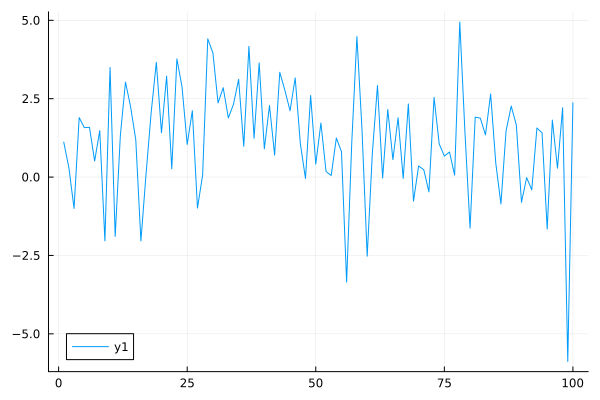

In [4]:
plot(Y)

In [5]:
model = SwitchingGaussianRegression(;K=2)

SwitchingGaussianRegression{Float64}([0.38522273770883764 0.6147772622911624; 0.6010793280911894 0.39892067190881064], RegressionEmissions[RegressionEmissions(Main.SSM.GaussianRegression(Float64[], 0.0, true)), RegressionEmissions(Main.SSM.GaussianRegression(Float64[], 0.0, true))], [0.18618742688088996, 0.81381257311911], 2)

In [6]:
ll = SSM.fit!(model, reshape(X[:, 2], length(X[:, 2]), 1), Y, 1000, 1e-3, true)

Log-Likelihood at iter 1: -246.54670359107263
Log-Likelihood at iter 2: -142.85002153203652
Log-Likelihood at iter 3: -139.35291938507535
Log-Likelihood at iter 4: -137.0490664154086
Log-Likelihood at iter 5: -135.39386976796183
Log-Likelihood at iter 6: -134.17183573453823
Log-Likelihood at iter 7: -133.275947278781
Log-Likelihood at iter 8: -132.6215725991737
Log-Likelihood at iter 9: -132.14411298773092
Log-Likelihood at iter 10: -131.79735474877162
Log-Likelihood at iter 11: -131.54764498026628
Log-Likelihood at iter 12: -131.3683940719816
Log-Likelihood at iter 13: -131.2381127231772
Log-Likelihood at iter 14: -131.1407560733128
Log-Likelihood at iter 15: -131.06551860279254
Log-Likelihood at iter 16: -131.0056091608501
Log-Likelihood at iter 17: -130.95683732116257
Log-Likelihood at iter 18: -130.91654521416368
Log-Likelihood at iter 19: -130.88294805759372
Log-Likelihood at iter 20: -130.85476672482935
Log-Likelihood at iter 21: -130.83103171427047
Log-Likelihood at iter 22: -13

1001-element Vector{Float64}:
  -Inf
 -246.54670359107263
 -142.85002153203652
 -139.35291938507535
 -137.0490664154086
 -135.39386976796183
 -134.17183573453823
 -133.275947278781
 -132.6215725991737
 -132.14411298773092
    ⋮
 -130.6819408453254
 -130.68194084532522
 -130.68194084532544
 -130.68194084532553
 -130.68194084532533
 -130.6819408453256
 -130.68194084532553
 -130.68194084532516
 -130.68194084532544

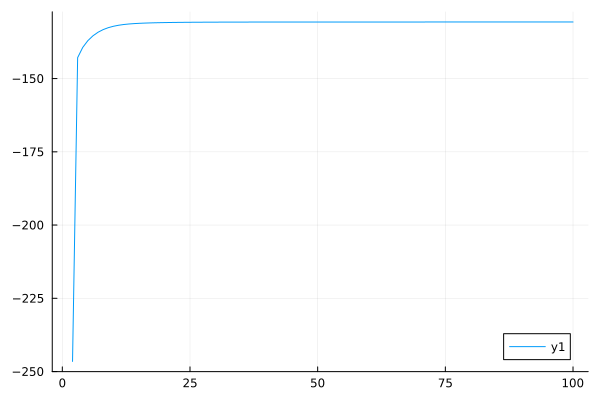

In [9]:
plot(ll[1:100])